In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from typing import Union

In [40]:
save_path = Path(r'C:\Users\86135\Desktop\大数据处理实验2\data\ST4000DM000')
data=pd.read_csv(save_path/'all_data.csv',nrows=100000,index_col=0).groupby('failure')

In [63]:
%matplotlib inline
def hist_attribute(df,bin=150):
    '''查看特征的分布情况如何'''
    plt.figure(figsize=[20,25])
    plt.title('feature distribution')
    for i in range(len(df.columns)):
        title=df.columns[i]
        plt.subplot(12,4,i+1)
        plt.hist(df.iloc[:,i].values,bins=bin)
        plt.title(title)
        plt.xlabel('value')
        plt.ylabel('count')

##  将all_data分为failed和heathy两部分，表内数据含有重复值

In [30]:
# 保证保存df为csv时，以追加的方式而不是覆盖
def save_df_in_chunks(df: pd.DataFrame, filepath: Union[str, Path]):
    if os.path.isfile(filepath):
        df.to_csv(filepath, header=False, mode='a', index=False)
    else:
        df.to_csv(filepath, index=False)

In [79]:
# 将SM型号的硬盘的2015年365天的数据分为failure和healthy的数据，其中这两个表的数据是包括重复值得
def take_failed_data(save_path: Path):
    chunksize = 10 ** 6
    # 分块处理硬盘数据
    for i,chunk in enumerate(pd.read_csv(save_path / 'all_data.csv', chunksize=chunksize, index_col=0)):
        print('the ',i,' chunk')
        # 分成failure和healthy两类数据，两个表
        grouped_chunk = chunk.groupby('failure')
        # 根据这个硬盘是否failed，将其添加到不同的csv文件里
        # df_group是一个df
        for group_name, df_group in grouped_chunk:
            # df_group.drop(['serial_number', 'failure'], inplace=True, axis=1)
            '''数据处理'''
            # df_group.dropna(how='all',axis=1).drop(['date','model'],axis=1).reset_index(drop=True)
            if group_name==1:
                save_df_in_chunks(df_group, save_path / f'failed.csv')
            else:
                save_df_in_chunks(df_group, save_path / f'healthy.csv')

In [80]:
take_failed_data(save_path)

the  0  chunk
the  1  chunk
the  2  chunk
the  3  chunk


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\86135\\Desktop\\大数据处理实验2\\data\\ST4000DM000\\failed.csv'

In [72]:
# data_prepare=pd.read_csv(save_path/'all_data.csv',nrows=100000,index_col=0).dropna(how='all',axis=1).drop(['date','model'],axis=1).reset_index(drop=True)

## 给数据去重

In [86]:
from sklearn.utils import shuffle

# 得到干净的数据
def read_data(type,num):
    # 删字段，去空值
    data=pd.read_csv(save_path/f'{type}.csv',nrows=num).dropna(how='all',axis=1).drop(['date','model'],axis=1).reset_index(drop=True)
    # 去重
    data.drop_duplicates(subset=['serial_number'],keep='first',inplace=True)
    return data

In [89]:
data_failed=read_data('failed',num=250)
data_healthy=read_data('healthy',num=250)
df_list=[data_failed,data_healthy]
data=pd.concat(df_list)
data=shuffle(data)

##  进行特征处理

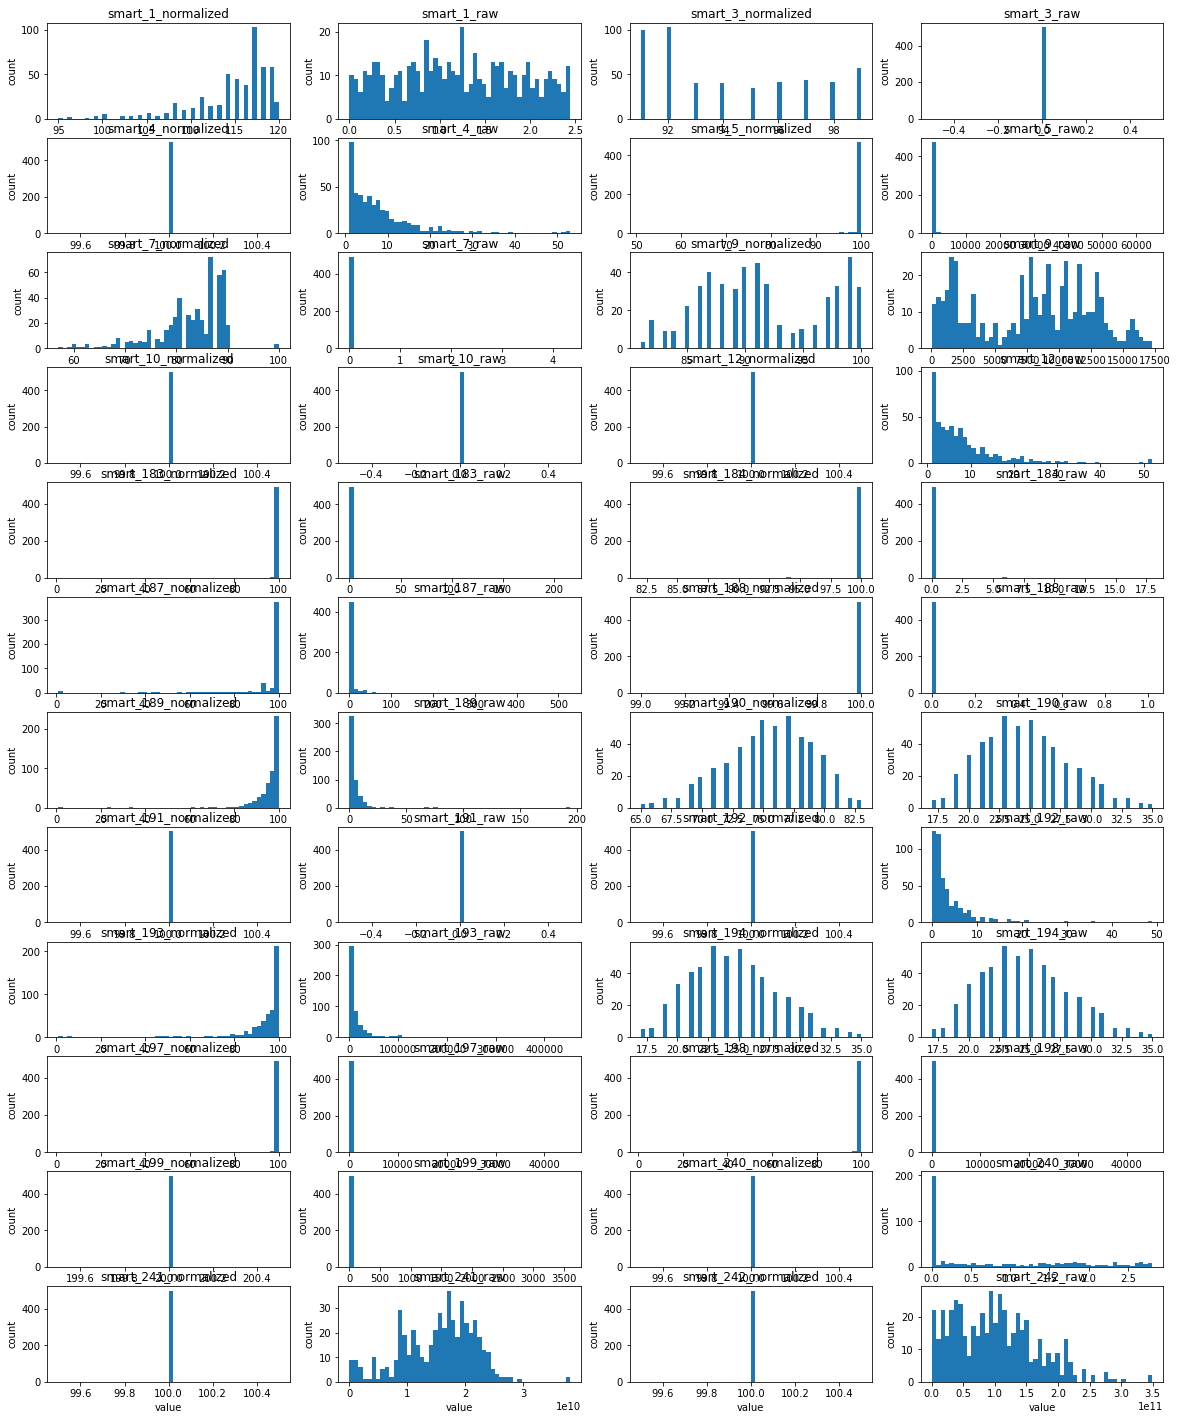

In [94]:
features=data.iloc[:,2:]
hist_attribute(features,bin=50)